<a href="https://colab.research.google.com/github/teoad95/Infusing-business-optimization-processes-with-machine-learning-and-expert-knowledge./blob/main/Main_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h2>Data visualization and preprocessing</h2>

Import pre-required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
cmap = sns.cm.mako_r
%matplotlib inline

In [2]:
# ignore warnings
import warnings
warnings.filterwarnings('ignore')

Load dataset

In [3]:
dataset_url = 'https://raw.githubusercontent.com/teoad95/Infusing-business-optimization-processes-with-machine-learning-and-expert-knowledge./main/Datasets/ExtendedDataset.csv'

In [4]:
runs = pd.read_csv(dataset_url, sep=';')

Describe data

In [24]:
runs.head()

,PMMaxWidth,RUNNUMBER,MaxWidth,MinWidth,NumberOfOrders,AverageWidth,Deviation,W1,W2,W3,W4,W5,W6,W7,W8,W9,W10,Dev1,Dev2,Dev3,Dev4,Dev5,Dev6,Dev7,Dev8,Dev9,Dev10,Avg1,Avg2,Avg3,Avg4,Avg5,Avg6,Avg7,Avg8,Avg9,Avg10,Min1,Min2,Min3,Min4,Min5,Min6,Min7,Min8,Min9,Min10,Max1,Max2,Max3,Max4,Max5,Max6,Max7,Max8,Max9,Max10,TotalWastePercent,Class
0,6400,270,5600,700,75,2749.000000,1497.336825,0,18,9,12,9,9,6,6,6,0,0.0,175.733756,86.602540,148.141901,150.00000,150.000000,54.772256,219.089023,0.000000,0.000000,0.0,950.000000,1800.000000,2156.250000,3000.000000,3700.000000,3950.000000,4900.000000,5600.000000,0.0,0.0,700.0,1700.0,2050.0,2800.0,3500.0,3900.0,4700.0,5600.0,0.0,0.0,1200.0,1900.0,2400.0,3100.0,3800.0,4000.0,5100.0,5600.0,0.0,0.032345,0
1,6400,170,5700,600,78,3129.807692,1536.028663,3,9,12,6,9,12,12,3,12,0,0.0,217.944947,178.416329,54.772256,86.60254,86.602540,154.478595,0.000000,261.116484,0.000000,600.0,966.666667,1668.750000,2250.000000,3100.000000,3575.000000,4075.000000,5000.000000,5450.000000,0.0,600.0,700.0,1400.0,2200.0,3000.0,3500.0,3900.0,5000.0,5200.0,0.0,600.0,1200.0,1875.0,2300.0,3200.0,3700.0,4300.0,5000.0,5700.0,0.0,0.033967,0
2,6400,15,5600,600,78,2921.153846,1662.624260,3,18,9,6,9,6,6,12,9,0,0.0,138.266580,180.277564,27.386128,86.60254,219.089023,219.089023,215.322169,132.287566,0.000000,600.0,983.333333,1733.333333,2025.000000,3100.000000,3600.000000,4200.000000,4750.000000,5433.333333,0.0,600.0,800.0,1500.0,2000.0,3000.0,3400.0,4000.0,4600.0,5300.0,0.0,600.0,1200.0,1900.0,2050.0,3200.0,3800.0,4400.0,5100.0,5600.0,0.0,0.054585,0
3,6500,222,6100,600,243,3297.530864,1538.325494,9,21,36,27,33,27,27,30,21,12,0.0,164.316767,143.551882,152.752523,156.66989,179.743407,157.707942,232.156309,134.164079,90.453403,600.0,1100.000000,1766.666667,2355.555556,3027.272727,3600.000000,4277.777778,4870.000000,5500.000000,5950.0,600.0,800.0,1500.0,2100.0,2700.0,3300.0,4000.0,4600.0,5300.0,5900.0,600.0,1300.0,1900.0,2600.0,3200.0,3800.0,4500.0,5200.0,5700.0,6100.0,0.154677,0
4,6500,437,6000,600,252,3337.797619,1539.162540,3,30,24,30,33,33,30,33,33,3,0.0,208.690498,159.482860,178.082459,156.66989,206.843155,113.714707,187.840600,168.212528,0.000000,600.0,970.000000,1625.000000,2287.500000,2872.727273,3618.181818,4250.000000,4818.181818,5572.727273,6000.0,600.0,700.0,1400.0,2050.0,2700.0,3300.0,4100.0,4600.0,5300.0,6000.0,600.0,1300.0,1900.0,2600.0,3200.0,3900.0,4400.0,5200.0,5800.0,6000.0,0.170383,0


In [25]:
runs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 564 entries, 0 to 563
Data columns (total 59 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   PMMaxWidth         564 non-null    int64  
 1   RUNNUMBER          564 non-null    int64  
 2   MaxWidth           564 non-null    int64  
 3   MinWidth           564 non-null    int64  
 4   NumberOfOrders     564 non-null    int64  
 5   AverageWidth       564 non-null    float64
 6   Deviation          564 non-null    float64
 7   W1                 564 non-null    int64  
 8   W2                 564 non-null    int64  
 9   W3                 564 non-null    int64  
 10  W4                 564 non-null    int64  
 11  W5                 564 non-null    int64  
 12  W6                 564 non-null    int64  
 13  W7                 564 non-null    int64  
 14  W8                 564 non-null    int64  
 15  W9                 564 non-null    int64  
 16  W10                564 non

In [26]:
runs.drop(columns=['RUNNUMBER']).describe()

,PMMaxWidth,MaxWidth,MinWidth,NumberOfOrders,AverageWidth,Deviation,W1,W2,W3,W4,W5,W6,W7,W8,W9,W10,Dev1,Dev2,Dev3,Dev4,Dev5,Dev6,Dev7,Dev8,Dev9,Dev10,Avg1,Avg2,Avg3,Avg4,Avg5,Avg6,Avg7,Avg8,Avg9,Avg10,Min1,Min2,Min3,Min4,Min5,Min6,Min7,Min8,Min9,Min10,Max1,Max2,Max3,Max4,Max5,Max6,Max7,Max8,Max9,Max10,TotalWastePercent,Class
count,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000
mean,6401.276596,5974.290780,760.948582,144.074468,3265.561841,1563.085394,2.547872,14.037234,18.632979,21.260638,15.691489,15.457447,15.563830,15.930851,15.430851,9.521277,1.876837,111.430047,163.156192,147.152321,135.202573,131.513819,134.409637,134.817131,136.468397,62.383231,293.088061,885.814397,1613.496235,2194.023652,2770.367966,3397.233729,3937.425274,4537.490609,5199.425328,5281.202079,291.312057,744.326241,1394.725177,2004.299645,2597.695035,3229.432624,3768.262411,4366.312057,5025.531915,5209.574468,295.035461,1023.936170,1813.962766,2404.166667,2939.184397,3560.106383,4111.170213,4709.574468,5371.631206,5352.304965,2.491932,1.285461
std,64.445729,224.507419,272.497552,75.602340,282.004223,131.999579,3.209031,11.066425,11.667616,11.175548,10.716459,11.004115,10.709029,11.434290,10.137974,7.351701,11.628515,78.311789,73.181534,54.246090,76.887551,73.799494,80.073613,76.273198,76.161291,54.896421,291.747090,302.312991,186.055745,151.169126,569.170197,677.622261,940.198260,1118.802787,1126.168448,1892.733948,290.670289,281.621302,198.752470,146.155276,540.913975,650.797323,903.950180,1080.474148,1091.638120,1868.467090,293.403193,348.115612,207.243039,187.699962,609.900590,714.319900,985.795770,1163.513007,1166.956311,1918.419181,2.100439,0.743283
min,6300.000000,4000.000000,400.000000,36.000000,2117.187500,870.148499,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.032345,0.000000
25%,6340.000000,6000.000000,600.000000,81.000000,3103.625000,1488.426615,0.000000,6.000000,9.000000,12.000000,6.000000,6.000000,6.000000,6.000000,6.000000,3.000000,0.000000,0.000000,137.223644,116.448645,86.602540,86.602540,85.192036,89.328971,90.453403,0.000000,0.000000,900.000000,1564.186508,2156.250000,2800.000000,3450.000000,4075.000000,4727.083333,5350.000000,5875.000000,0.000000,700.000000,1300.000000,1950.000000,2600.000000,3200.000000,3900.000000,4500.000000,5200.000000,5800.000000,0.000000,1000.000000,1800.000000,2300.000000,3000.000000,3600.000000,4300.000000,4900.000000,5500.000000,6000.000000,1.211506,1.000000
50%,6400.000000,6100.000000,600.000000,126.000000,3278.141026,1575.472321,3.000000,12.000000,18.000000,21.000000,12.000000,12.000000,15.000000,15.000000,15.000000,9.000000,0.000000,134.014173,180.277564,159.273198,152.127766,151.083047,156.669890,156.459514,156.397420,54.772256,400.000000,955.050505,1622.222222,2203.333333,2880.000000,3525.000000,4150.000000,4800.000000,5433.333333,5950.000000,400.000000,700.000000,1300.000000,2000.000000,2600.000000,3300.000000,3900.000000,4600.000000,5200.000000,5800.000000,400.000000,1200.000000,1875.000000,2500.000000,3100.000000,3700.0000

In [82]:
runs = runs.fillna(0)

Define classes method

In [9]:
def classification_condition(row):
  total_waste_value = row['TotalWastePercent']
  if total_waste_value < 1:
    return 0
  if total_waste_value < 2:
    return 1
  return 2

In [29]:
runs['Class'] = runs.apply (lambda row: classification_condition(row), axis=1)

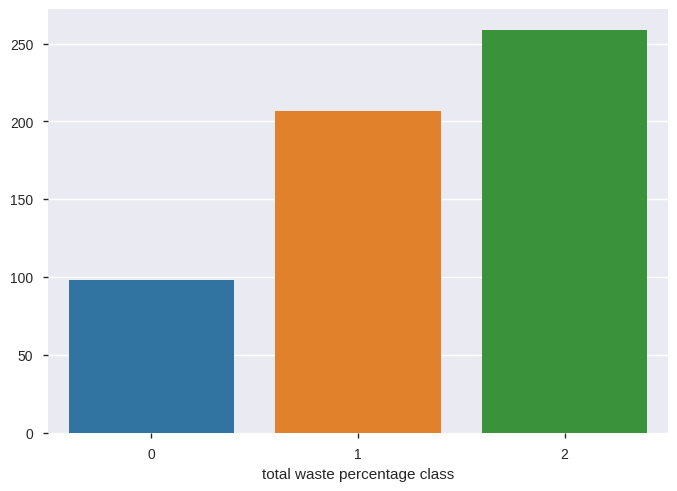

In [30]:
# Checking if Data is balanced
xs = runs['Class'].value_counts().index
ys = runs['Class'].value_counts().values

ax = sns.barplot(xs, ys)
ax.set_xlabel("total waste percentage class")
plt.show()

Define methods:

*   Print metrics
*   Test model



In [31]:
from sklearn.metrics import accuracy_score, classification_report, plot_confusion_matrix

def print_metrics(actual, prediction, model, x_test, y_test):
  print(f"Accuracy Score : {round(accuracy_score(actual, prediction) * 100, 2)}%")
  print(classification_report(actual, prediction))
  plot_confusion_matrix(model, x_test, y_test, cmap=cmap)
  plt.grid(False)
  plt.show()

In [32]:
def test_model(model, xtrain, ytrain, xtest, ytest):
  model.fit(xtrain, ytrain)
  preds = model.predict(xtest)
  print_metrics(ytest, preds, model, xtest, ytest)

In [33]:
# Splitting into features and value to be predicted
X = runs.drop(columns=['RUNNUMBER', 'TotalWastePercent', 'Class'])
y = runs['Class']

In [34]:
from numpy import array 

Feature selection using SelectKBest with CΗΙ2

In [35]:
from sklearn.feature_selection import SelectKBest, chi2
select = SelectKBest(score_func=chi2, k=25)
z = select.fit_transform(X, y) 

filter = select.get_support(indices=True)
X_new = runs.iloc[:,filter]

In [36]:
X_new.head()

,MaxWidth,MinWidth,NumberOfOrders,W1,W10,Dev1,Dev2,Dev3,Dev4,Dev6,Dev7,Dev9,Dev10,Avg1,Avg4,Avg7,Avg9,Avg10,Min4,Min9,Min10,Max1,Max4,Max7,Max9
0,5600,700,75,0,0,0.0,175.733756,86.602540,148.141901,150.000000,54.772256,0.000000,0.000000,0.0,2156.250000,3950.000000,5600.000000,0.0,2050.0,5600.0,0.0,0.0,2400.0,4000.0,5600.0
1,5700,600,78,3,0,0.0,217.944947,178.416329,54.772256,86.602540,154.478595,261.116484,0.000000,600.0,2250.000000,4075.000000,5450.000000,0.0,2200.0,5200.0,0.0,600.0,2300.0,4300.0,5700.0
2,5600,600,78,3,0,0.0,138.266580,180.277564,27.386128,219.089023,219.089023,132.287566,0.000000,600.0,2025.000000,4200.000000,5433.333333,0.0,2000.0,5300.0,0.0,600.0,2050.0,4400.0,5600.0
3,6100,600,243,9,12,0.0,164.316767,143.551882,152.752523,179.743407,157.707942,134.164079,90.453403,600.0,2355.555556,4277.777778,5500.000000,5950.0,2100.0,5300.0,5900.0,600.0,2600.0,4500.0,5700.0
4,6000,600,252,3,3,0.0,208.690498,159.482860,178.082459,206.843155,113.714707,168.212528,0.000000,600.0,2287.500000,4250.000000,5572.727273,6000.0,2050.0,5300.0,6000.0,600.0,2600.0,4400.0,5800.0


Feature selection using SelectKBest with f_regression

In [37]:
from sklearn.feature_selection import SelectKBest, f_regression

select = SelectKBest(score_func=f_regression, k=20)
z = select.fit_transform(X, y) 
filter = select.get_support(indices=True)
X_new = runs.iloc[:,filter]

In [38]:
X_new.head()

,MaxWidth,MinWidth,NumberOfOrders,Deviation,W1,W2,W3,W4,W5,W6,W7,Dev1,Dev2,Dev3,Dev10,Avg1,Avg10,Min10,Max1,Max2
0,5600,700,75,1497.336825,0,18,9,12,9,9,6,0.0,175.733756,86.602540,0.000000,0.0,0.0,0.0,0.0,1200.0
1,5700,600,78,1536.028663,3,9,12,6,9,12,12,0.0,217.944947,178.416329,0.000000,600.0,0.0,0.0,600.0,1200.0
2,5600,600,78,1662.624260,3,18,9,6,9,6,6,0.0,138.266580,180.277564,0.000000,600.0,0.0,0.0,600.0,1200.0
3,6100,600,243,1538.325494,9,21,36,27,33,27,27,0.0,164.316767,143.551882,90.453403,600.0,5950.0,5900.0,600.0,1300.0
4,6000,600,252,1539.162540,3,30,24,30,33,33,30,0.0,208.690498,159.482860,0.000000,600.0,6000.0,6000.0,600.0,1300.0


In [39]:
def plot_corr_matrix(datast):
    corrMatrix = datast.corr()
    plt.figure(figsize=(35,15))
    sns.heatmap(corrMatrix, annot=True)
    plt.show()
    

Correlation matrix of starting feature set

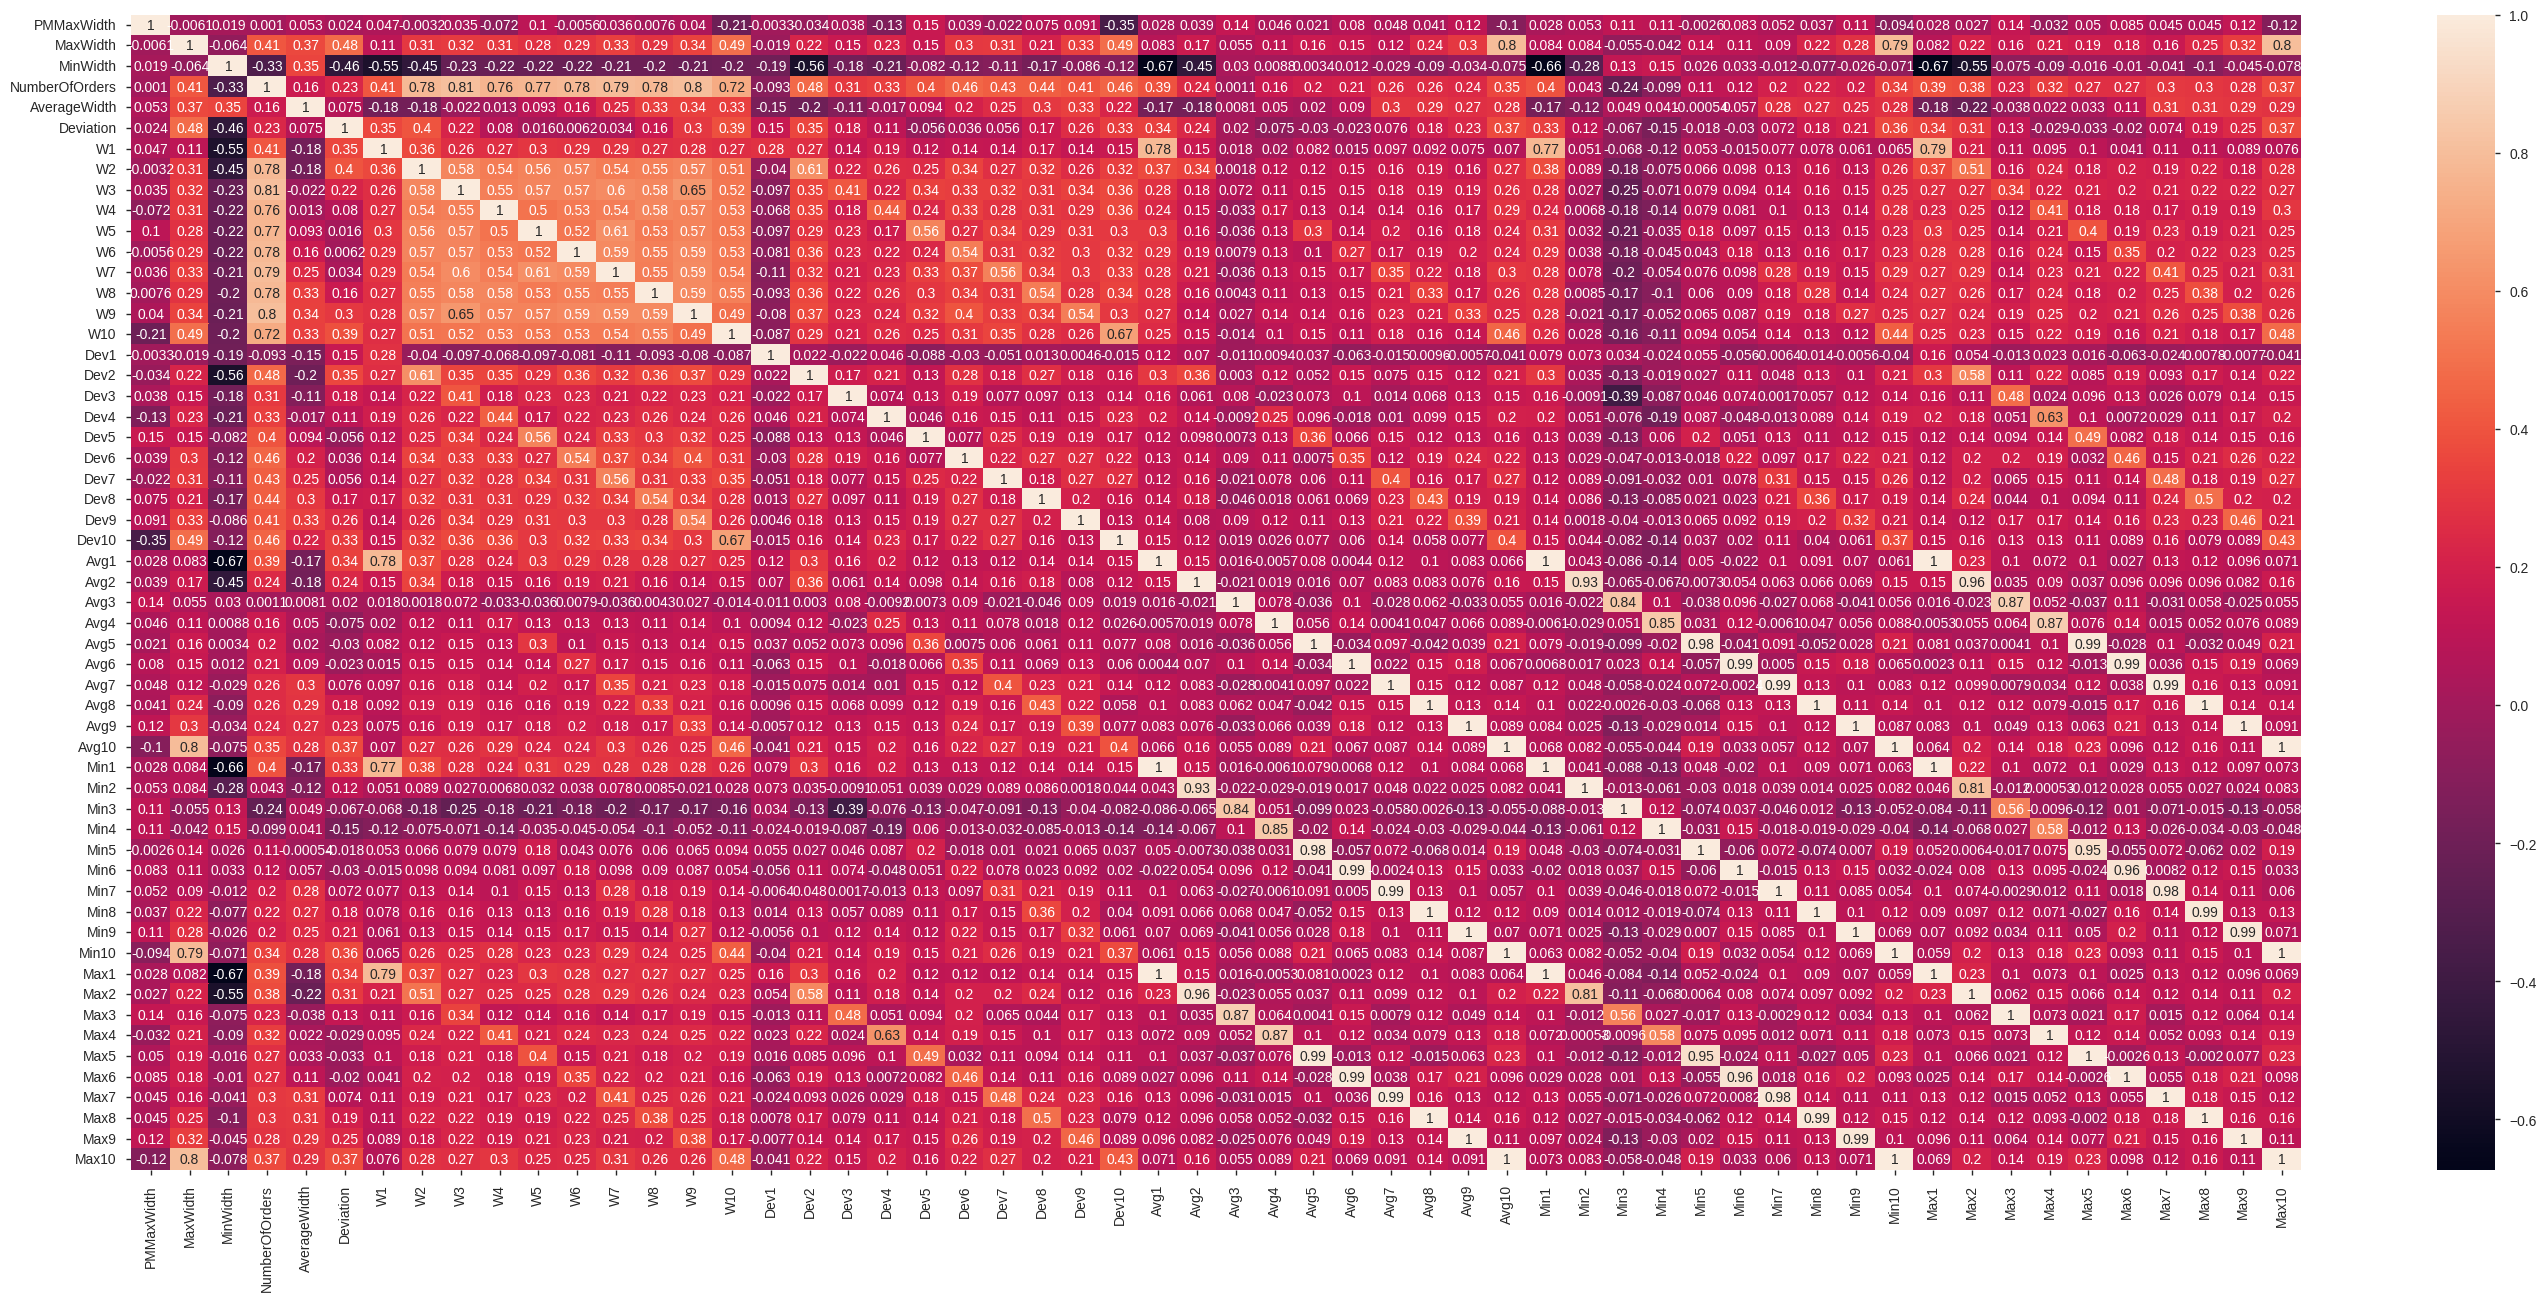

In [83]:
plot_corr_matrix(X)

Correlation matrix of selected feature set

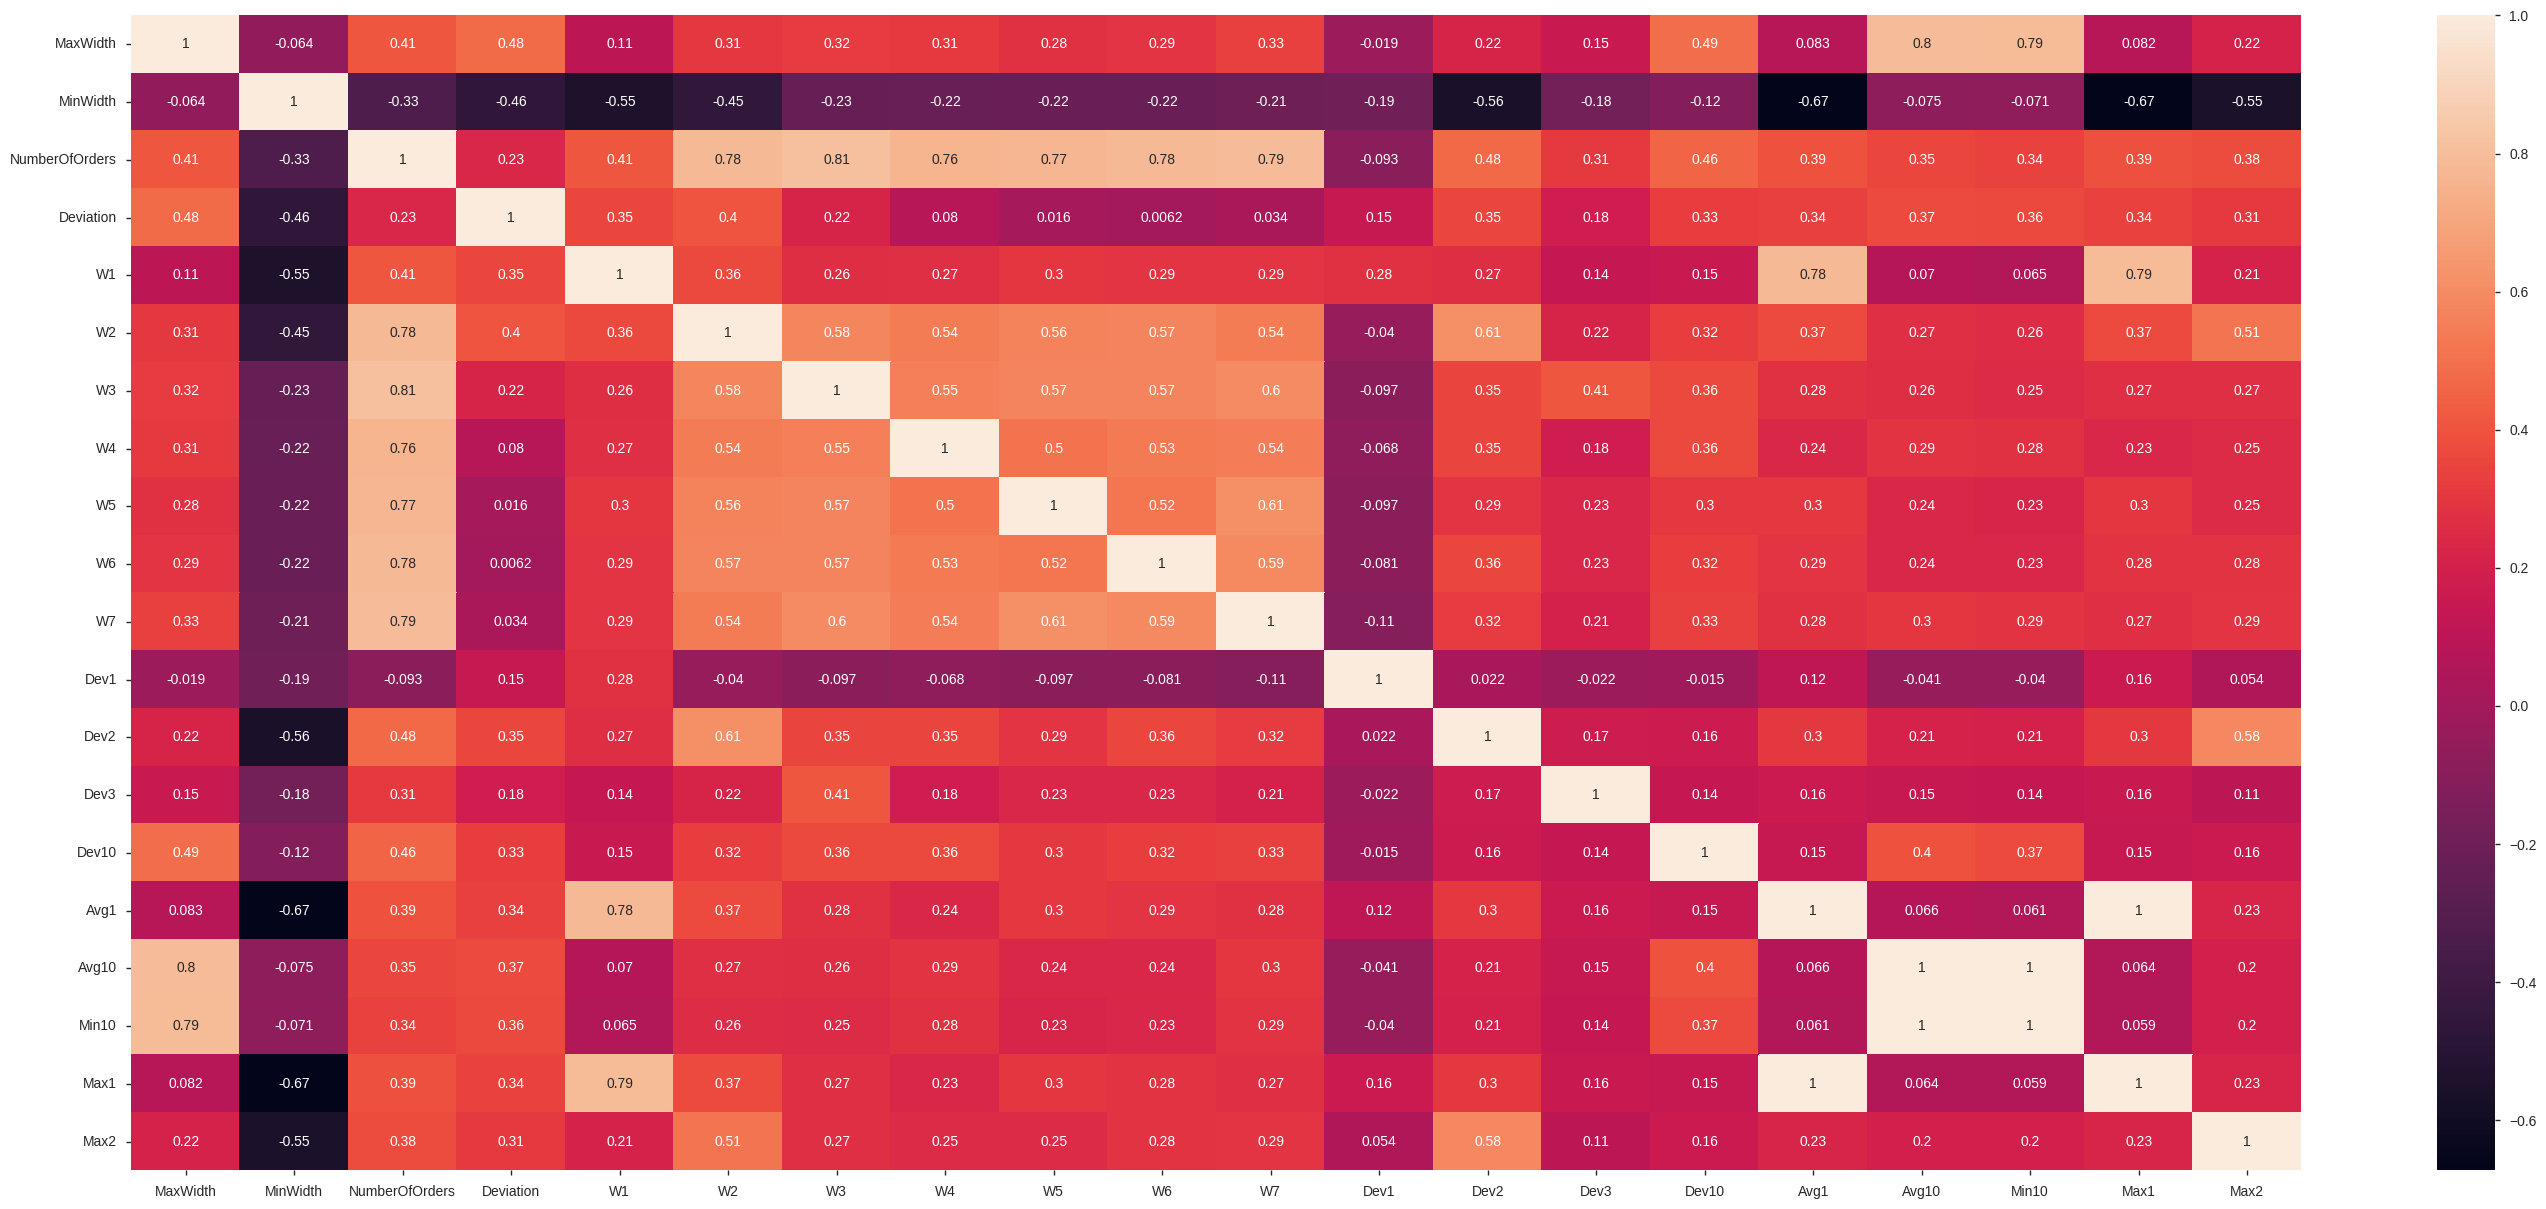

In [40]:
plot_corr_matrix(X_new)

Split data

In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.20, random_state = 0)

Standarize selected features from f_regression


In [43]:
from sklearn.preprocessing import StandardScaler

In [44]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Experiments with standarized feature set


In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

Accuracy Score : 63.72%
              precision    recall  f1-score   support

           0       0.15      0.12      0.14        16
           1       0.55      0.59      0.57        39
           2       0.81      0.81      0.81        58

    accuracy                           0.64       113
   macro avg       0.50      0.51      0.51       113
weighted avg       0.63      0.64      0.63       113



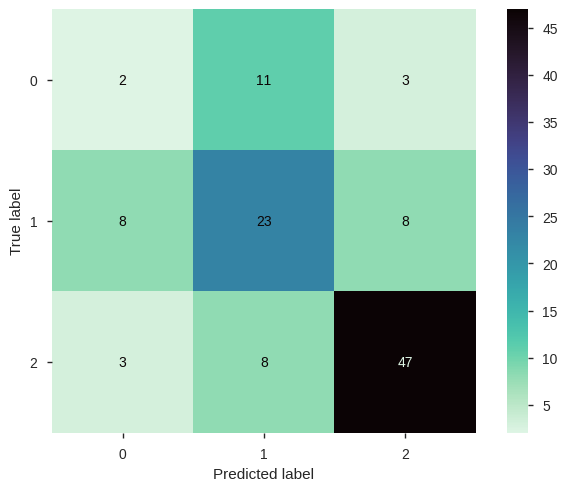

In [47]:
log_reg = LogisticRegression()
test_model(log_reg, X_train, y_train, X_test, y_test)

Accuracy Score : 60.18%
              precision    recall  f1-score   support

           0       0.11      0.06      0.08        16
           1       0.51      0.56      0.54        39
           2       0.74      0.78      0.76        58

    accuracy                           0.60       113
   macro avg       0.45      0.47      0.46       113
weighted avg       0.57      0.60      0.58       113



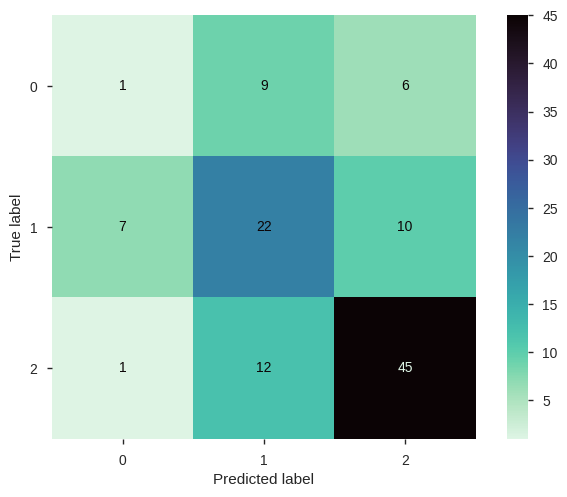

In [48]:
nb = GaussianNB()
test_model(nb, X_train, y_train, X_test, y_test)

Accuracy Score : 61.06%
              precision    recall  f1-score   support

           0       0.11      0.06      0.08        16
           1       0.53      0.59      0.56        39
           2       0.74      0.78      0.76        58

    accuracy                           0.61       113
   macro avg       0.46      0.48      0.47       113
weighted avg       0.58      0.61      0.59       113



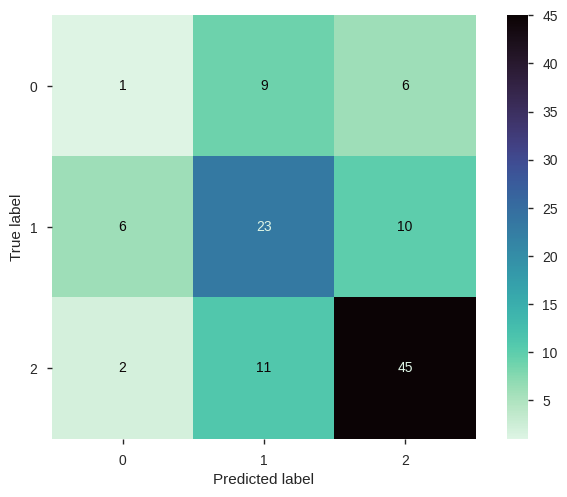

In [49]:
rf = RandomForestClassifier()
test_model(rf, X_train, y_train, X_test, y_test)

Accuracy Score : 61.06%
              precision    recall  f1-score   support

           0       0.27      0.19      0.22        16
           1       0.54      0.54      0.54        39
           2       0.71      0.78      0.74        58

    accuracy                           0.61       113
   macro avg       0.51      0.50      0.50       113
weighted avg       0.59      0.61      0.60       113



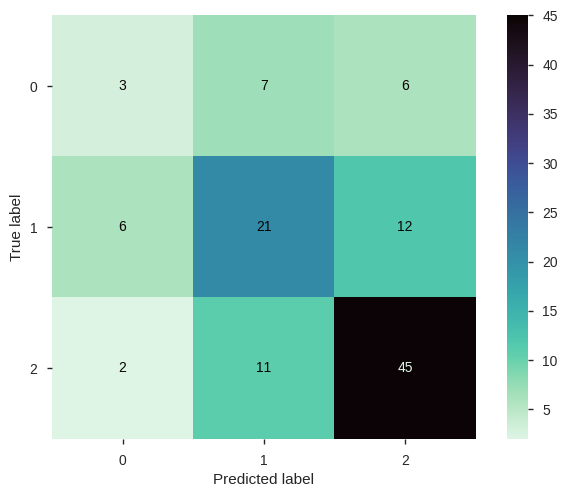

In [52]:
xgb = XGBClassifier()
test_model(xgb, X_train, y_train, X_test, y_test)

Accuracy Score : 52.21%
              precision    recall  f1-score   support

           0       0.21      0.31      0.25        16
           1       0.41      0.44      0.43        39
           2       0.77      0.64      0.70        58

    accuracy                           0.52       113
   macro avg       0.46      0.46      0.46       113
weighted avg       0.57      0.52      0.54       113



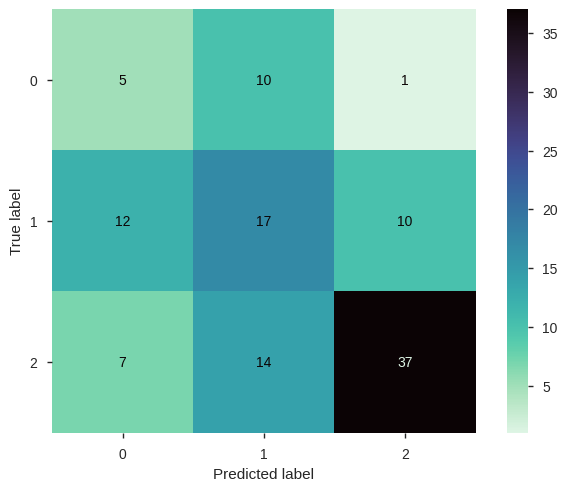

In [59]:
knn = KNeighborsClassifier()
test_model(knn, X_train, y_train, X_test, y_test)

Accuracy Score : 56.64%
              precision    recall  f1-score   support

           0       0.15      0.12      0.14        16
           1       0.47      0.44      0.45        39
           2       0.70      0.78      0.74        58

    accuracy                           0.57       113
   macro avg       0.44      0.45      0.44       113
weighted avg       0.55      0.57      0.55       113



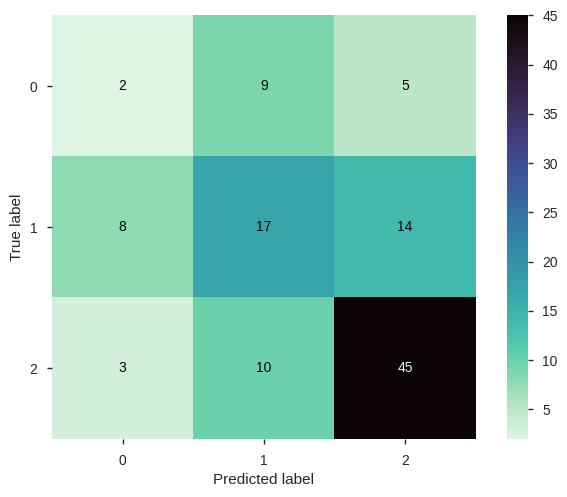

In [61]:
dt = DecisionTreeClassifier()
test_model(dt, X_train, y_train, X_test, y_test)

Accuracy Score : 62.83%
              precision    recall  f1-score   support

           0       0.25      0.06      0.10        16
           1       0.52      0.67      0.58        39
           2       0.75      0.76      0.75        58

    accuracy                           0.63       113
   macro avg       0.51      0.50      0.48       113
weighted avg       0.60      0.63      0.60       113



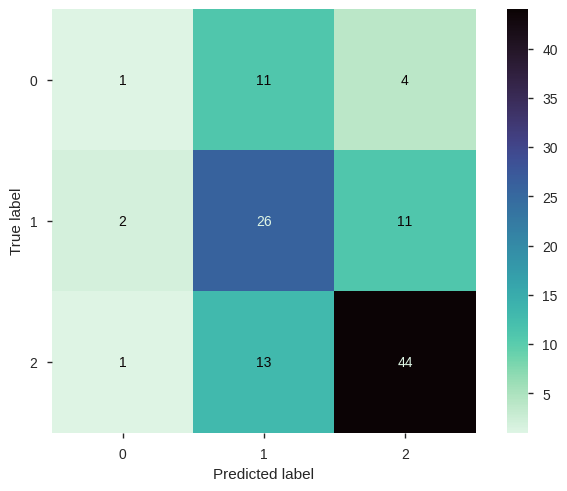

In [62]:
svc =  SVC()
test_model(svc, X_train, y_train, X_test, y_test)

Accuracy Score : 64.6%
              precision    recall  f1-score   support

           0       0.25      0.25      0.25        16
           1       0.57      0.62      0.59        39
           2       0.82      0.78      0.80        58

    accuracy                           0.65       113
   macro avg       0.55      0.55      0.55       113
weighted avg       0.65      0.65      0.65       113



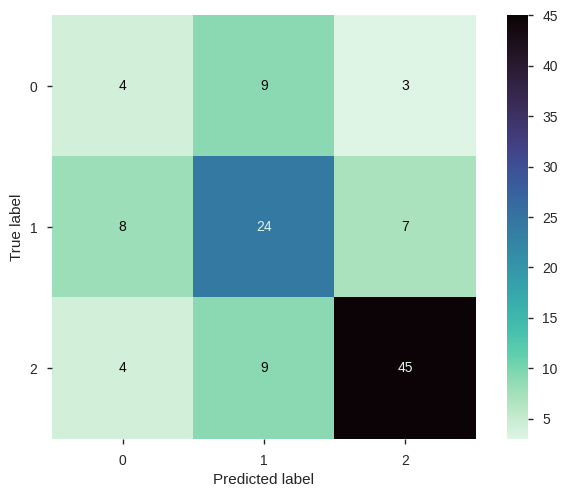

In [63]:
linear_disc = LinearDiscriminantAnalysis()
test_model(linear_disc, X_train, y_train, X_test, y_test)

Accuracy Score : 64.6%
              precision    recall  f1-score   support

           0       0.25      0.25      0.25        16
           1       0.57      0.62      0.59        39
           2       0.82      0.78      0.80        58

    accuracy                           0.65       113
   macro avg       0.55      0.55      0.55       113
weighted avg       0.65      0.65      0.65       113



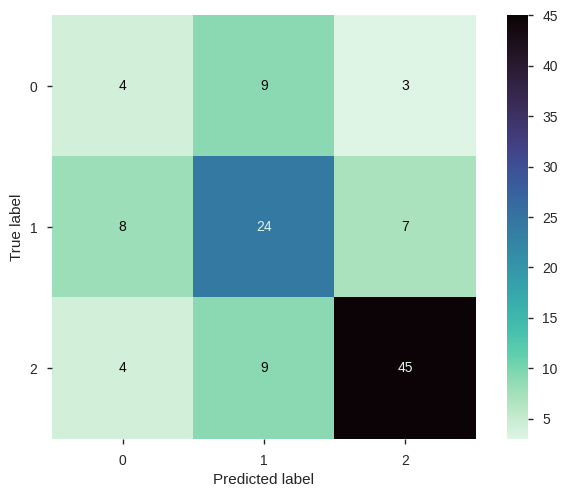

In [64]:
decision_trees = DecisionTreeClassifier()
test_model(linear_disc, X_train, y_train, X_test, y_test)

Repeat experiments after oversampling minority classes

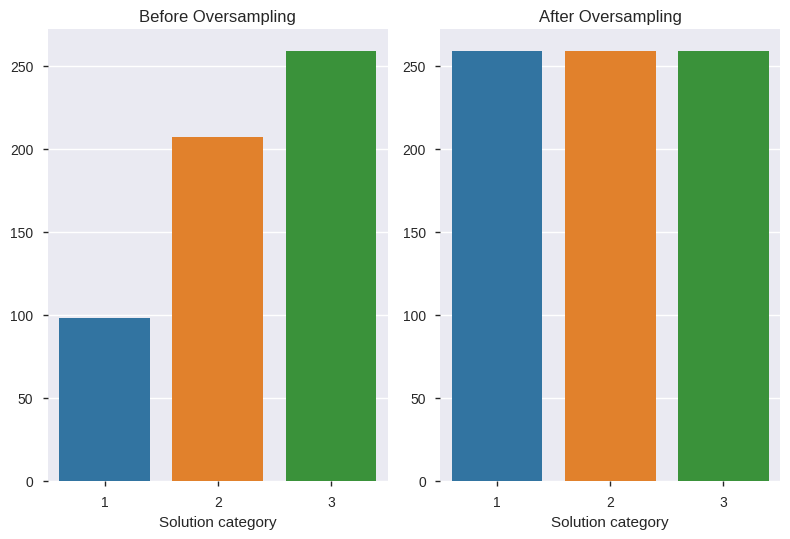

In [67]:
fig, (ax1, ax2) = plt.subplots(1, 2)

sns.barplot(x=['1', '2', '3'], y =[sum(y == 0), sum(y == 1), sum(y == 2)], ax = ax1)
ax1.set_title("Before Oversampling")
ax1.set_xlabel('Solution category')

#Using SMOTE to balance the Data
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state = 2) 
X_oversampled, y_oversampled = sm.fit_resample(X_new, y) 

sns.barplot(x=['1', '2', '3'], y =[sum(y_oversampled == 0), sum(y_oversampled == 1), sum(y_oversampled == 2)], ax = ax2)
ax2.set_title("After Oversampling")
ax2.set_xlabel('Solution category')

plt.tight_layout()
plt.show()

In [68]:
X_train_oversampled, X_test_oversampled, y_train_oversampled, y_test_oversampled = train_test_split(X_oversampled, y_oversampled, test_size=0.20, random_state = 0)

Accuracy Score : 58.33%
              precision    recall  f1-score   support

           0       0.53      0.53      0.53        55
           1       0.50      0.60      0.55        50
           2       0.78      0.63      0.70        51

    accuracy                           0.58       156
   macro avg       0.60      0.58      0.59       156
weighted avg       0.60      0.58      0.59       156



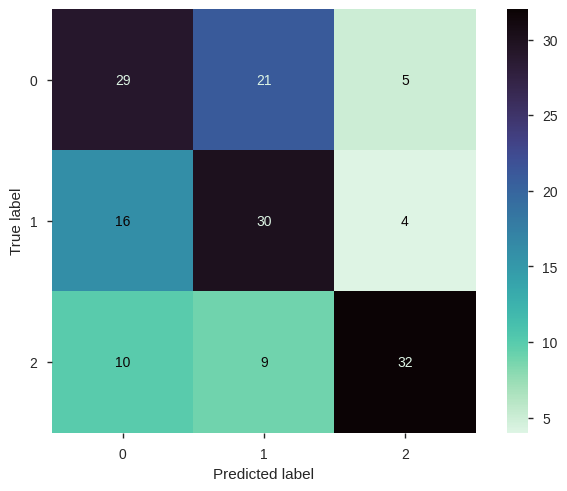

In [69]:
log_reg = LogisticRegression()
test_model(log_reg, X_train_oversampled, y_train_oversampled, X_test_oversampled, y_test_oversampled)

Accuracy Score : 51.28%
              precision    recall  f1-score   support

           0       0.53      0.18      0.27        55
           1       0.45      0.66      0.54        50
           2       0.58      0.73      0.64        51

    accuracy                           0.51       156
   macro avg       0.52      0.52      0.48       156
weighted avg       0.52      0.51      0.48       156



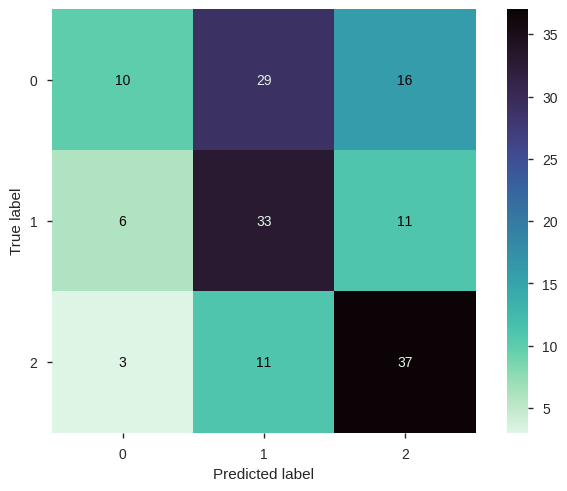

In [73]:
nb = GaussianNB()
test_model(nb, X_train_oversampled, y_train_oversampled, X_test_oversampled, y_test_oversampled)

Accuracy Score : 75.64%
              precision    recall  f1-score   support

           0       0.82      0.85      0.84        55
           1       0.68      0.72      0.70        50
           2       0.76      0.69      0.72        51

    accuracy                           0.76       156
   macro avg       0.75      0.75      0.75       156
weighted avg       0.76      0.76      0.76       156



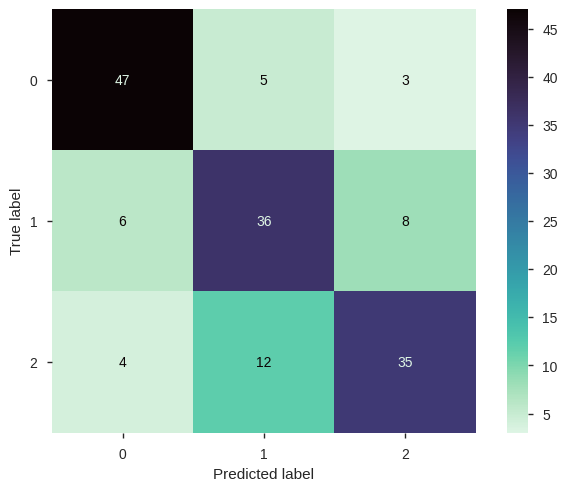

In [74]:
rf = RandomForestClassifier()
test_model(rf, X_train_oversampled, y_train_oversampled, X_test_oversampled, y_test_oversampled)

Accuracy Score : 78.21%
              precision    recall  f1-score   support

           0       0.84      0.89      0.87        55
           1       0.70      0.74      0.72        50
           2       0.80      0.71      0.75        51

    accuracy                           0.78       156
   macro avg       0.78      0.78      0.78       156
weighted avg       0.78      0.78      0.78       156



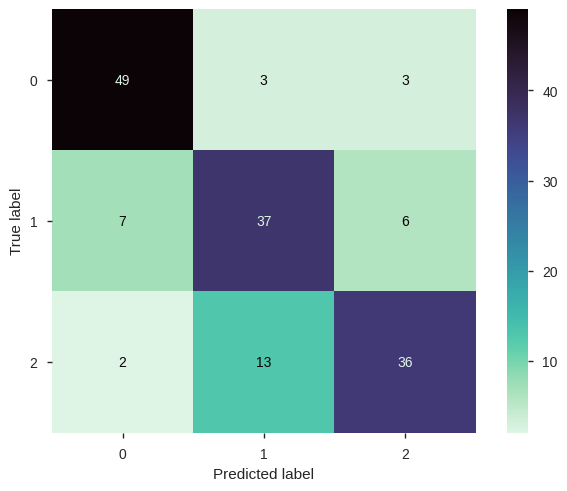

In [75]:
rf = RandomForestClassifier()
test_model(rf, X_train_oversampled, y_train_oversampled, X_test_oversampled, y_test_oversampled)

Accuracy Score : 73.08%
              precision    recall  f1-score   support

           0       0.79      0.75      0.77        55
           1       0.62      0.76      0.68        50
           2       0.81      0.69      0.74        51

    accuracy                           0.73       156
   macro avg       0.74      0.73      0.73       156
weighted avg       0.74      0.73      0.73       156



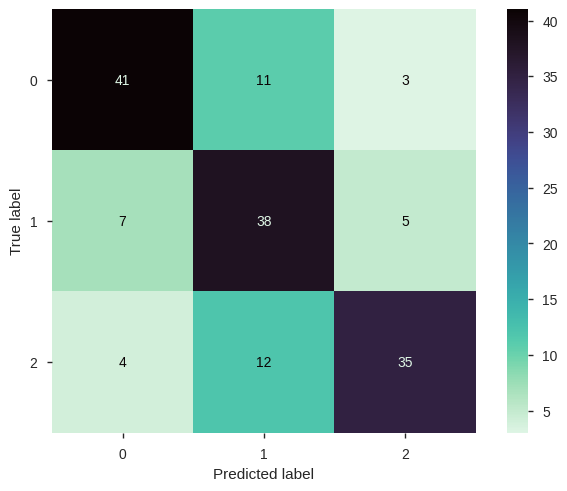

In [76]:
xgb = XGBClassifier()
test_model(xgb, X_train_oversampled, y_train_oversampled, X_test_oversampled, y_test_oversampled)

Accuracy Score : 67.95%
              precision    recall  f1-score   support

           0       0.69      0.87      0.77        55
           1       0.60      0.54      0.57        50
           2       0.76      0.61      0.67        51

    accuracy                           0.68       156
   macro avg       0.68      0.67      0.67       156
weighted avg       0.68      0.68      0.67       156



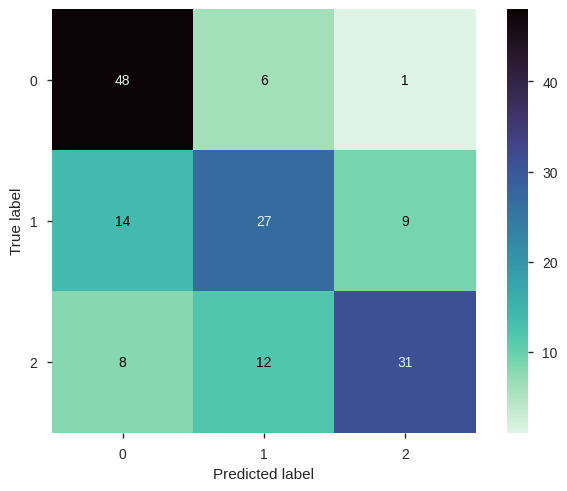

In [77]:
knn = KNeighborsClassifier()
test_model(knn, X_train_oversampled, y_train_oversampled, X_test_oversampled, y_test_oversampled)

Accuracy Score : 69.23%
              precision    recall  f1-score   support

           0       0.79      0.75      0.77        55
           1       0.62      0.58      0.60        50
           2       0.67      0.75      0.70        51

    accuracy                           0.69       156
   macro avg       0.69      0.69      0.69       156
weighted avg       0.69      0.69      0.69       156



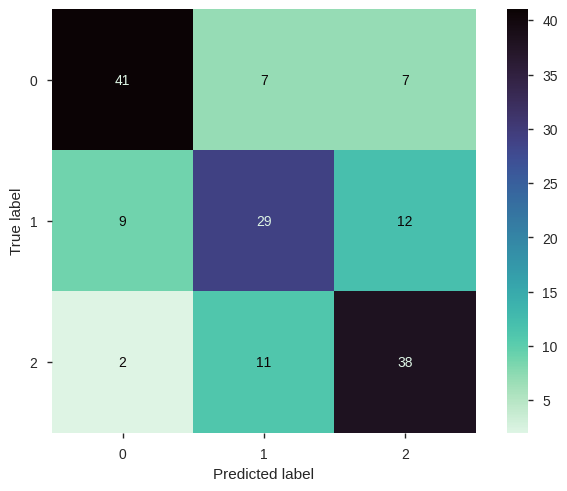

In [78]:
dt = DecisionTreeClassifier()
test_model(dt, X_train_oversampled, y_train_oversampled, X_test_oversampled, y_test_oversampled)

Accuracy Score : 49.36%
              precision    recall  f1-score   support

           0       0.38      0.11      0.17        55
           1       0.44      0.80      0.57        50
           2       0.63      0.61      0.62        51

    accuracy                           0.49       156
   macro avg       0.48      0.51      0.45       156
weighted avg       0.48      0.49      0.44       156



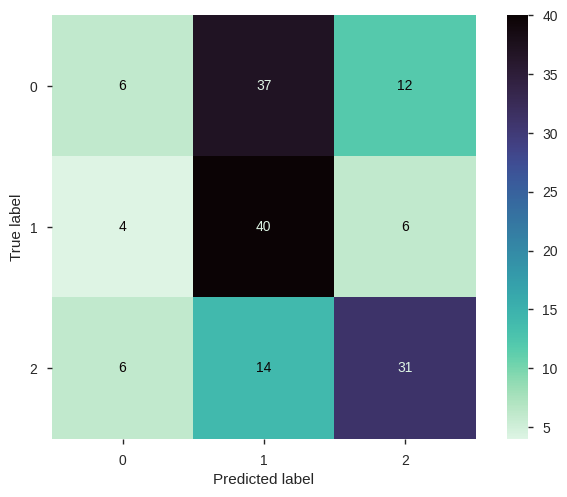

In [79]:
svc =  SVC()
test_model(svc, X_train_oversampled, y_train_oversampled, X_test_oversampled, y_test_oversampled)

Accuracy Score : 57.05%
              precision    recall  f1-score   support

           0       0.53      0.56      0.54        55
           1       0.46      0.52      0.49        50
           2       0.80      0.63      0.70        51

    accuracy                           0.57       156
   macro avg       0.59      0.57      0.58       156
weighted avg       0.59      0.57      0.58       156



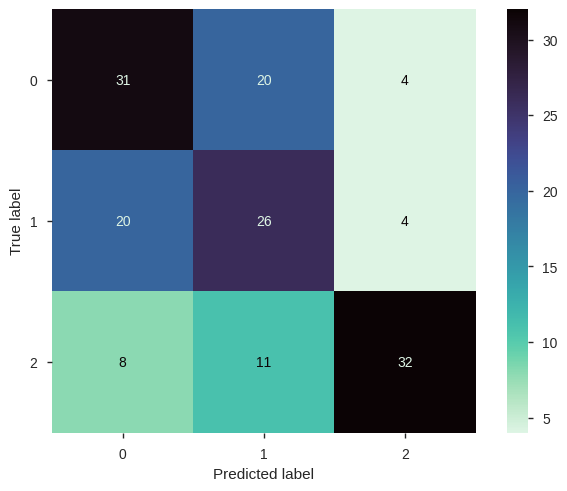

In [80]:
linear_disc = LinearDiscriminantAnalysis()
test_model(linear_disc, X_train_oversampled, y_train_oversampled, X_test_oversampled, y_test_oversampled)

Accuracy Score : 57.05%
              precision    recall  f1-score   support

           0       0.53      0.56      0.54        55
           1       0.46      0.52      0.49        50
           2       0.80      0.63      0.70        51

    accuracy                           0.57       156
   macro avg       0.59      0.57      0.58       156
weighted avg       0.59      0.57      0.58       156



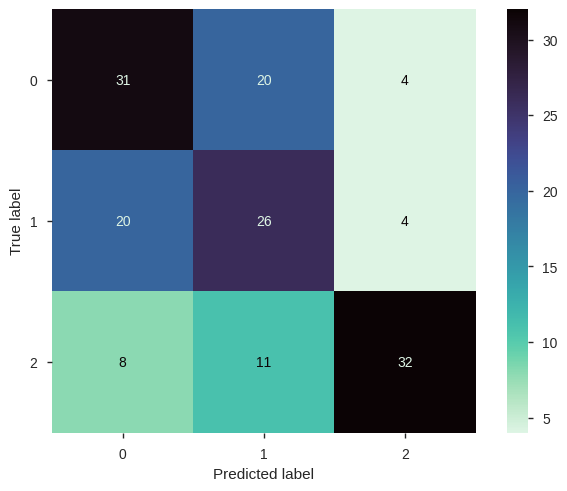

In [81]:
decision_trees = DecisionTreeClassifier()
test_model(linear_disc, X_train_oversampled, y_train_oversampled, X_test_oversampled, y_test_oversampled)